In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython import display
%matplotlib inline


In [2]:
df = pd.read_csv("housing.csv")

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [3]:
# let's see what our data looks like
df.head(5)
df = df.dropna()

labels = df["ocean_proximity"].unique()

for i in range(0,len(df)):
    for j in range(0, len(labels)):
        if df["ocean_proximity"].iloc[i] == labels[j]:
            df["ocean_proximity"].iloc[i] = float(j)
        

## Summary Statistics

In [4]:
def describe(df, stats):
    d = df.describe()
    return d.append(df.reindex(d.columns, axis = 1).agg(stats))

describe(df, ['median'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000
median,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000


## Distributions 

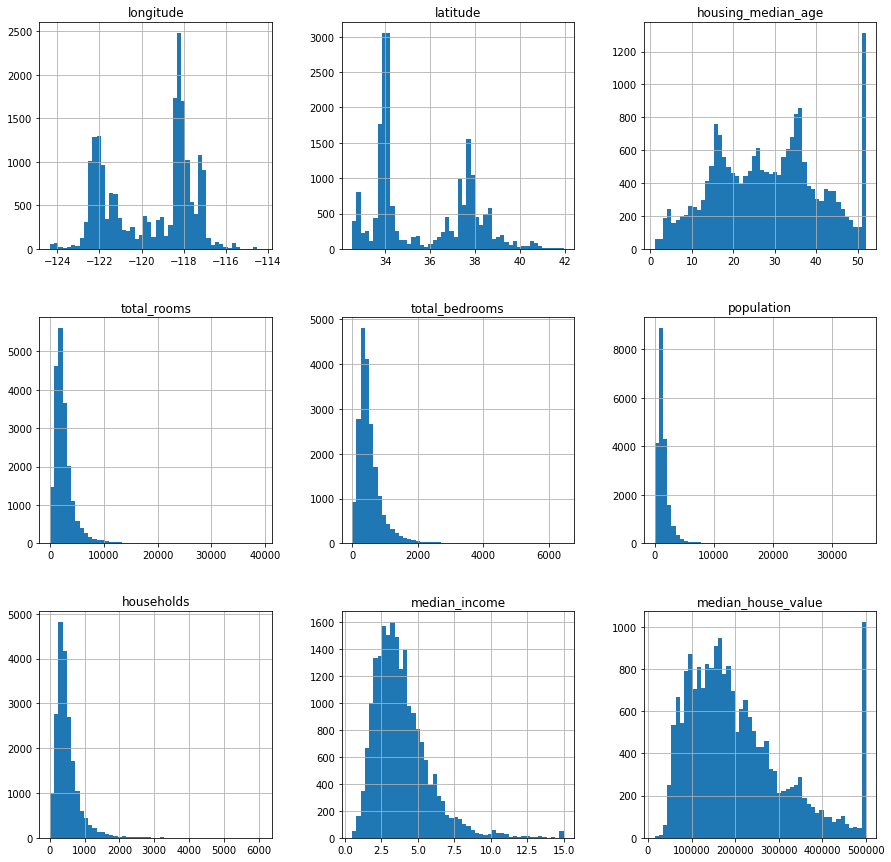

In [5]:
# Let's make a histogram for the numerical features now
df.hist(bins = 50, figsize = (15, 15))
plt.show()

## Correlations and Trends

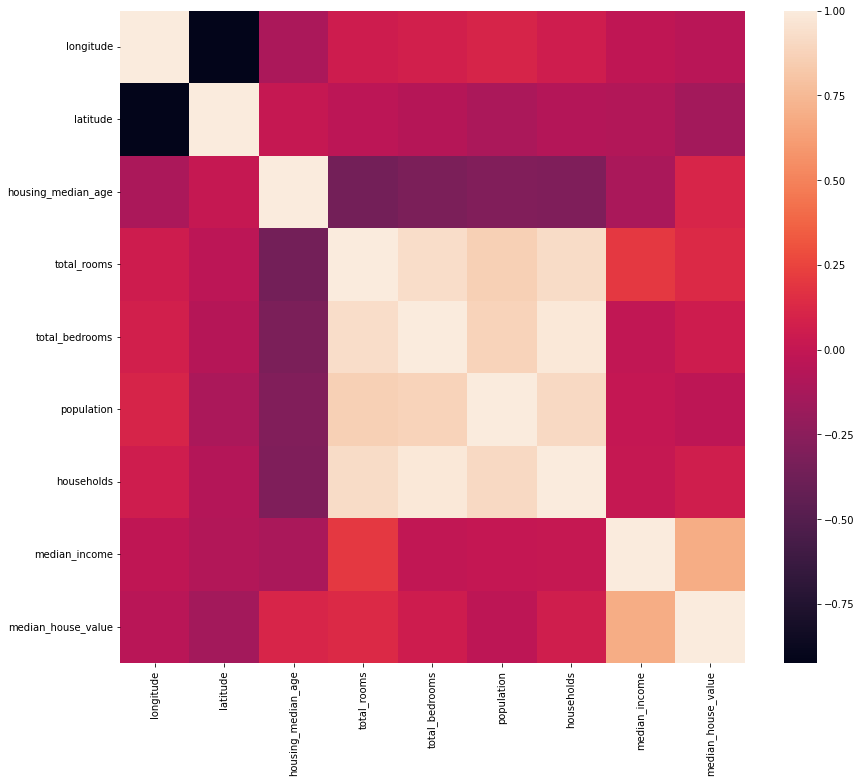

In [6]:
plt.figure(figsize = (14,12))
sns.heatmap(df.corr());

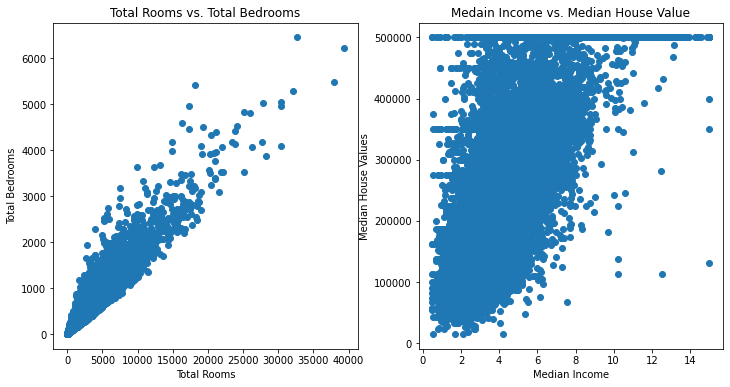

In [7]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Total Rooms vs. Total Bedrooms")
plt.scatter(df["total_rooms"],df["total_bedrooms"])
plt.xlabel("Total Rooms")
plt.ylabel("Total Bedrooms")

plt.subplot(1,2,2)
plt.title("Medain Income vs. Median House Value")
plt.scatter(df["median_income"],df["median_house_value"])
plt.xlabel("Median Income")
plt.ylabel("Median House Values");

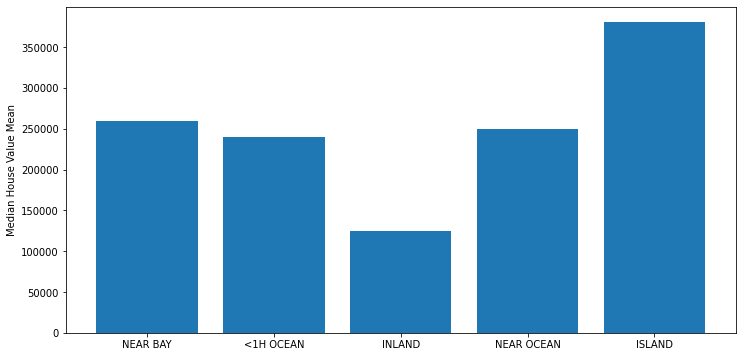

In [8]:
means = []
for i in df["ocean_proximity"].unique():
    means.append(df["median_house_value"][df["ocean_proximity"] == i].mean())
    

plt.figure(figsize = (12,6))
plt.bar(df["ocean_proximity"].unique(),means)
plt.ylabel("Median House Value Mean");

Text(0, 0.5, 'Longitude')

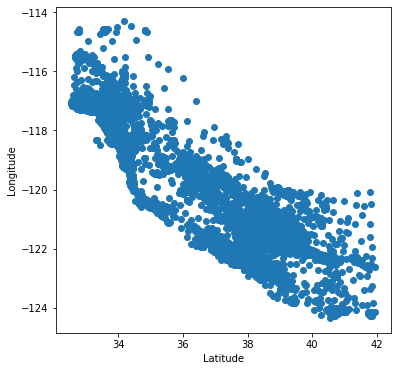

In [9]:
plt.figure(figsize = (6,6))
plt.scatter(df["latitude"], df["longitude"])
plt.xlabel("Latitude")
plt.ylabel("Longitude")

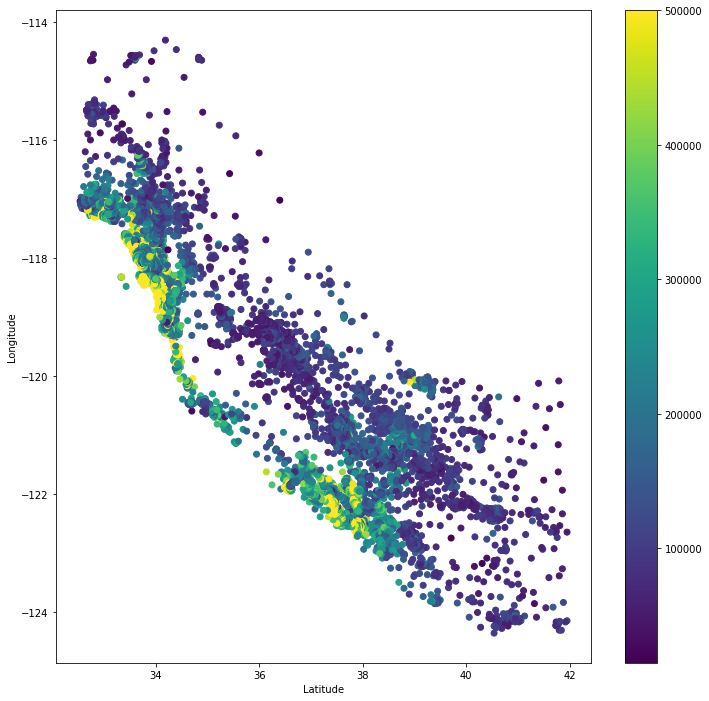

In [10]:
plt.figure(figsize = (12,12))
plt.scatter(df["latitude"], df["longitude"], c = df["median_house_value"])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.colorbar();

## Predicting House Value

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df["ocean_proximity"])
df["ocean_proximity"] = le.transform(df["ocean_proximity"] )

df = df.sample(frac=1)

## Full Feature Model

In [12]:
x = df[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms",
        "population","households","median_income","ocean_proximity"]]
y = df["median_house_value"]

xtrain = x[:int(.8*len(x))]
ytrain = y[:int(.8*len(y))]

xtest = x[int(.8*len(x)):]
ytest = y[int(.8*len(y)):]

reg = DecisionTreeRegressor()
reg.fit(xtrain,ytrain)
print("Accuracy: " + str(reg.score(xtest, ytest)))

Accuracy: 0.6394437034814875


## Select Feature Model

In [13]:
x = df[["latitude","longitude", "median_income"]]
y = df["median_house_value"]

xtrain = x[:int(.8*len(x))]
ytrain = y[:int(.8*len(y))]

xtest = x[int(.8*len(x)):]
ytest = y[int(.8*len(y)):]


reg = DecisionTreeRegressor()
reg.fit(xtrain,ytrain)
print("Accuracy: " + str(reg.score(xtest, ytest)))

Accuracy: 0.6965150305290152
